# Practicing loss functions and regression metrics

Below you will practice looking at loss functions and look at regression metrics related to these loss functions.

## 1. Load packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

## 2. Plotting functions

Here are the functions from the presentation to make visualizing your regressions easier:

In [3]:
def plot_regression(x, y, model):
    plt.figure(figsize=(10,8))
    axes = plt.gca()
    
    intercept = model.params[0]
    slope = model.params[1]

    for x_, y_ in zip(x, y):    
        plt.plot((x_, x_), (y_, x_*slope + intercept),
                 'k-', ls='dashed', lw=1)
        
    plt.scatter(x, y, s=70, c='steelblue')
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    regline_y = x_points*slope + intercept

    plt.plot(regline_x, regline_y, c='darkred', lw=3.5)

    plt.show()
    
    
def plot_leastsq_loss(model):
    plt.figure(figsize=(10,8))
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    for r in resids:
        plt.plot((r, r), (0, r**2), 'k-', ls='dashed', lw=2)
        
    plt.plot(resid_points, resid_points**2, c='gold', alpha=0.7)
    

def plot_residuals_ladloss(model):
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    plt.figure(figsize=(10,8))
    
    for r in resids:
        
        plt.plot((r, r), (0, abs(r)), 'k-', ls='dashed', lw=1)
        
    plt.plot(resid_points, np.abs(resid_points), c='gold', alpha=0.7)
    


## 3. Load in the data from project 3

Load your data from project 3

In [2]:
sales = pd.read_csv('/Users/kiefer/Desktop/Iowa_Liquor_Sales_reduced.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
sales_sample = sales.sample(frac=0.1)

In [10]:
sales_sample.shape

(270955, 18)

In [11]:
sales_sample.to_csv('/Users/kiefer/Desktop/Iowa_Liquor_sales_sample_10pct.csv', index=False)

## 4. Choose a continuous response variable and predictor variable from the dataset

If you choose columns with dollar amounts, you will need to remove the dollar signs!

In [8]:
cost = sales['State Bottle Cost'].values
sold = sales['Bottles Sold'].values

In [10]:
cost = np.array([float(x.replace('$','')) for x in cost])

## 5. Choose a small subset of the predictor and response variables you chose

You can use the ```np.random.choice()``` function to get a random sample of indices. Look up how to use it!

In [14]:
indices_sample = np.random.choice(range(0,len(cost)), size=50, replace=False)

cost_sample = cost[indices_sample]
sold_sample = sold[indices_sample]

## 6. Build a least squares regression model predicting your response from your predictors

Remember to use your sample so you can plot this later!

I did not provide the code to create the regression. Either look it up in the statsmodels documentation or refer to the slides so you can practice doing this yourself.

In [15]:
leastsq_reg = sm.OLS(sold_sample, sm.add_constant(cost_sample)).fit()
print leastsq_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     8.506
Date:                Wed, 27 Apr 2016   Prob (F-statistic):            0.00537
Time:                        07:55:26   Log-Likelihood:                -184.25
No. Observations:                  50   AIC:                             372.5
Df Residuals:                      48   BIC:                             376.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         16.6932      2.725      6.126      0.0

## 7. Plot the least squares regression

You can use the ```plot_regression(x, y, model)``` function provided.

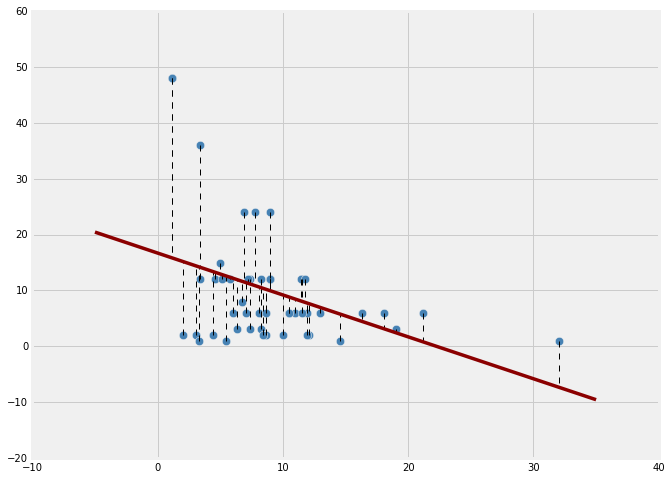

In [16]:
plot_regression(cost_sample, sold_sample, leastsq_reg)

## 8. Build a least absolute deviation quantreg model on the same sample

In [17]:
lad_reg = QuantReg(sold_sample, sm.add_constant(cost_sample)).fit(q=0.5)
print lad_reg.summary()

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.02361
Model:                       QuantReg   Bandwidth:                       9.803
Method:                 Least Squares   Sparsity:                        18.26
Date:                Wed, 27 Apr 2016   No. Observations:                   50
Time:                        07:58:32   Df Residuals:                       48
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.4166      2.528      3.725      0.001         4.334    14.499
x1            -0.2630      0.239     -1.101      0.276        -0.743     0.217


## 9. Plot the LAD regression

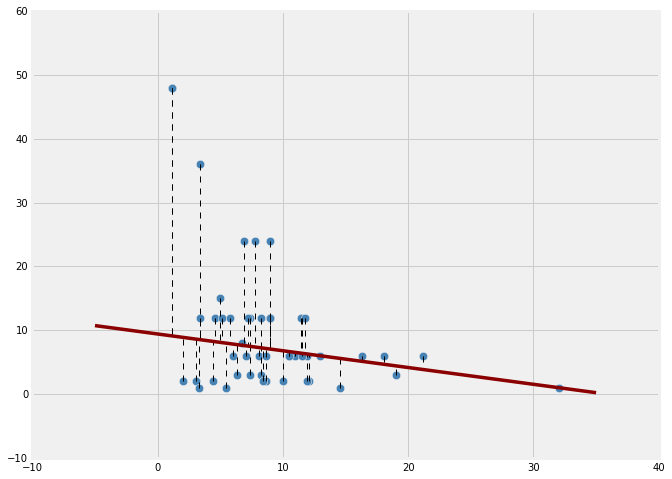

In [18]:
plot_regression(cost_sample, sold_sample, lad_reg)

## 10. Calculate the RMSE and the MAE between you response and predicted response

**RMSE** is the **root mean squared error**. It is a metric for the performance of your regression related to the least squared loss. 

$$\text{RMSE} = \sqrt{\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$

https://en.wikipedia.org/wiki/Root-mean-square_deviation

**MAE** is the **mean absolute error**. It is a metric for regression performace when the loss function is the least absolute deviation.

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$

https://en.wikipedia.org/wiki/Average_absolute_deviation

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
leastsq_predictions = leastsq_reg.predict()
lad_predictions = lad_reg.predict()

In [27]:
print np.sqrt(mean_squared_error(sold_sample, leastsq_predictions))

9.64191830261


In [28]:
print mean_absolute_error(sold_sample, lad_predictions)

6.26839559208


## 11. [BONUS] What would be the loss function to find the _mode_ and why?

Remember that the least squares loss minimizes:

### $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

And the least absolute deviation loss minimizes:

### $$y = \sum_{i}{|\hat{y}_i - y_i |^1}$$

**Do you see a pattern here?**


The loss function to find the mode of a response variable with predictors minimizes the sum:

$$\frac{\sum_{i}{|\hat{y}_i - y_i |^{0}}}{n}$$

This is because $0^0=0$ and $x^0=1$ otherwise.

**The minimum is where the predicted responses are equal to the most common response**. This is because there will be the most 0 values where the predicted response matches the most true responses. Any other predicted response becomes 1!

## 12. [BONUS] Create a quantile regression with q = 0.25 and plot it. What exactly is this regression predicting?

In [33]:
q25_reg = QuantReg(sold_sample, sm.add_constant(cost_sample)).fit(q=0.25)
print q25_reg.summary()

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.004054
Model:                       QuantReg   Bandwidth:                       9.079
Method:                 Least Squares   Sparsity:                        21.80
Date:                Wed, 27 Apr 2016   No. Observations:                   50
Time:                        08:25:32   Df Residuals:                       48
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.4903      3.172      1.100      0.277        -2.887     9.868
x1            -0.0778      0.320     -0.243      0.809        -0.721     0.565


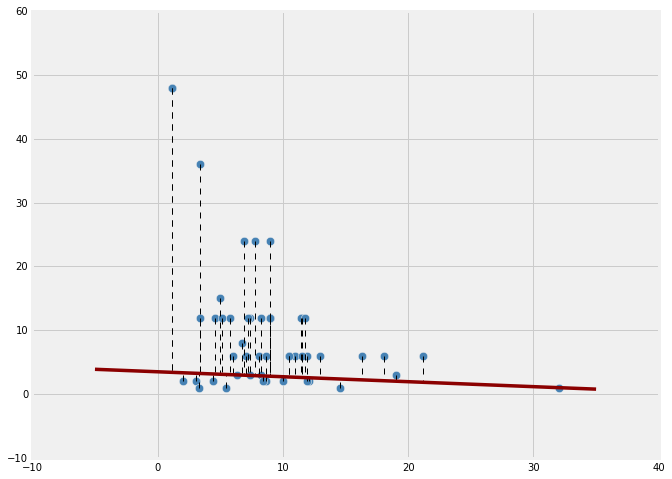

In [34]:
plot_regression(cost_sample, sold_sample, q25_reg)

When q=0.25, the quantile regression is **predicting the 25th percentile of the response variable given the predictors**.